# Модуль 1

## 1.1 Подготовка данных

In [73]:
# Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# отключить предпреждения
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
train_df = pd.read_csv("train_ses.csv")
test_df = pd.read_csv("test_ses.csv")

train_df.head(4)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0


In [74]:
test_df.head(4)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,...,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
1,2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,...,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
2,3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,...,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
3,4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,...,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23


Данные успешно загрузились

In [75]:
print(f"Размер обучающей выборки: {train_df.shape}\nРазмер тестовой выборки: {test_df.shape}")

Размер обучающей выборки: (253561, 22)
Размер тестовой выборки: (82797, 21)


In [76]:
# Уберём в отдельную переменную целевое значение
y=train_df['target']
train_df.drop(columns=['target'], inplace=True)
y

0         0
1         0
2         0
3         0
4         0
         ..
253556    0
253557    0
253558    0
253559    0
253560    0
Name: target, Length: 253561, dtype: int64

In [77]:
# Так как мы убрали столбец target в обучающей выборке можем склеить обе таблицы
data_all=pd.concat([train_df, test_df], axis=0, ignore_index=True)
print(f"Общий размер данных: {data_all.shape}")

Общий размер данных: (336358, 21)


In [78]:
# Посмотрим на типы данных
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336358 entries, 0 to 336357
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  336358 non-null  int64  
 1   site1       336358 non-null  int64  
 2   time1       336358 non-null  object 
 3   site2       331406 non-null  float64
 4   time2       331406 non-null  object 
 5   site3       326994 non-null  float64
 6   time3       326994 non-null  object 
 7   site4       323503 non-null  float64
 8   time4       323503 non-null  object 
 9   site5       320170 non-null  float64
 10  time5       320170 non-null  object 
 11  site6       317061 non-null  float64
 12  time6       317061 non-null  object 
 13  site7       314137 non-null  float64
 14  time7       314137 non-null  object 
 15  site8       311375 non-null  float64
 16  time8       311375 non-null  object 
 17  site9       308568 non-null  float64
 18  time9       308568 non-null  object 
 19  si

In [79]:
# Разабьём в 2 группы данные по сайтам и времени
sites_df = data_all[[f'site{i}' for i in range(1, 11)]]
times_df = data_all[[f'time{i}' for i in range(1, 11)]]

In [80]:
# Сначала обработаем данные по сайтам
sites_df.head(5)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
0,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0
2,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0
3,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0
4,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0


In [81]:
# Техническая информация
sites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336358 entries, 0 to 336357
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   336358 non-null  int64  
 1   site2   331406 non-null  float64
 2   site3   326994 non-null  float64
 3   site4   323503 non-null  float64
 4   site5   320170 non-null  float64
 5   site6   317061 non-null  float64
 6   site7   314137 non-null  float64
 7   site8   311375 non-null  float64
 8   site9   308568 non-null  float64
 9   site10  305858 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 25.7 MB


In [82]:
# Информация по пропускам
sites_df.isnull().sum()/len(sites_df) * 100

site1     0.000000
site2     1.472241
site3     2.783939
site4     3.821821
site5     4.812729
site6     5.737042
site7     6.606354
site8     7.427503
site9     8.262030
site10    9.067720
dtype: float64

In [83]:
# Заполним пропуски, так как сайт не был посещён поставим 0
sites_df.fillna(0, inplace=True)
sites_df.isnull().sum()/len(sites_df) * 100

site1     0.0
site2     0.0
site3     0.0
site4     0.0
site5     0.0
site6     0.0
site7     0.0
site8     0.0
site9     0.0
site10    0.0
dtype: float64

In [84]:
# Приведём все данные к целочисленному виду
for col in sites_df.columns:
  sites_df[col] = sites_df[col].astype(np.int64)
sites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336358 entries, 0 to 336357
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   site1   336358 non-null  int64
 1   site2   336358 non-null  int64
 2   site3   336358 non-null  int64
 3   site4   336358 non-null  int64
 4   site5   336358 non-null  int64
 5   site6   336358 non-null  int64
 6   site7   336358 non-null  int64
 7   site8   336358 non-null  int64
 8   site9   336358 non-null  int64
 9   site10  336358 non-null  int64
dtypes: int64(10)
memory usage: 25.7 MB


In [85]:
# Теперь обработаем данные о времени и приведём их к типу датавремя
for col in times_df.columns:
    times_df[col] = pd.to_datetime(times_df[col])
times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336358 entries, 0 to 336357
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time1   336358 non-null  datetime64[ns]
 1   time2   331406 non-null  datetime64[ns]
 2   time3   326994 non-null  datetime64[ns]
 3   time4   323503 non-null  datetime64[ns]
 4   time5   320170 non-null  datetime64[ns]
 5   time6   317061 non-null  datetime64[ns]
 6   time7   314137 non-null  datetime64[ns]
 7   time8   311375 non-null  datetime64[ns]
 8   time9   308568 non-null  datetime64[ns]
 9   time10  305858 non-null  datetime64[ns]
dtypes: datetime64[ns](10)
memory usage: 25.7 MB


In [86]:
# Перезапишем данные в общую таблицу
data_all[[f'site{i}' for i in range(1, 11)]] = sites_df
data_all[[f'time{i}' for i in range(1, 11)]] = times_df

In [87]:
data_all.head(4)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,1,718,2014-02-20 10:02:45,0,NaT,0,NaT,0,NaT,0,...,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT
1,2,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,...,3846,2014-02-22 11:19:51,3847,2014-02-22 11:19:52,3846,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16
2,3,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,...,39,2013-12-16 16:40:19,14768,2013-12-16 16:40:20,14768,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24
3,4,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,...,782,2014-03-28 10:54:42,782,2014-03-28 10:55:12,782,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42


## 1.2 Работа с разреженным форматом данных

Сформировать мешок сайтов. То есть необходимо создать новые матрицы, в которых строкам будут соответствовать сессии из 10 сайтов, а столбцам – индексы сайтов. На пересечении строки и столбца будет стоять число – количество раз, которое встретился сайт в сессии номер N.

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

def row_to_text(row):
    return ' '.join(map(str, row))

sites_text = sites_df.apply(row_to_text, axis=1)

cv = CountVectorizer()
new_features = cv.fit_transform(sites_text)
print(new_features)

  (0, 45232)	1
  (1, 47142)	1
  (1, 47708)	2
  (1, 31631)	2
  (1, 47719)	1
  (1, 31620)	2
  (1, 5734)	1
  (1, 5756)	1
  (2, 5299)	2
  (2, 32219)	2
  (2, 5298)	5
  (2, 29997)	1
  (3, 45943)	10
  (4, 13332)	1
  (4, 8555)	4
  (4, 8333)	2
  (4, 8666)	3
  (5, 43590)	2
  (5, 12221)	3
  (6, 29997)	1
  (6, 12221)	1
  (6, 46176)	2
  (6, 14443)	1
  (6, 43874)	1
  (6, 8349)	1
  :	:
  (336354, 22443)	3
  (336354, 22221)	3
  (336354, 2423)	1
  (336354, 2401)	1
  (336354, 2457)	1
  (336354, 2468)	1
  (336355, 29997)	1
  (336355, 13332)	1
  (336355, 12221)	1
  (336355, 14443)	1
  (336355, 21109)	1
  (336355, 25553)	1
  (336355, 27775)	1
  (336355, 22220)	1
  (336355, 44787)	1
  (336355, 44789)	1
  (336356, 12221)	3
  (336356, 14443)	2
  (336356, 47930)	1
  (336356, 43732)	1
  (336356, 26110)	1
  (336356, 46187)	1
  (336356, 47186)	1
  (336357, 12221)	1
  (336357, 1089)	9


In [89]:
new_features_train = new_features[:253561]
new_features_test = new_features[:253561]

Мы получили разряжённую матрицу которую можем преобразовать в датафрейм

## 1.3 Визуализация данных

In [90]:
# Посмотрим взаимную информацию уже по текущим данным
X=sites_df[:253561]
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

site1     0.013650
site10    0.012802
site5     0.011846
site6     0.009835
Name: MI Scores, dtype: float64

In [91]:
# Дабавим новые значения такие как время начала и день начала
data_all['start_hour'] = data_all['time1'].dt.hour
data_all['weekday'] = data_all['time1'].dt.weekday

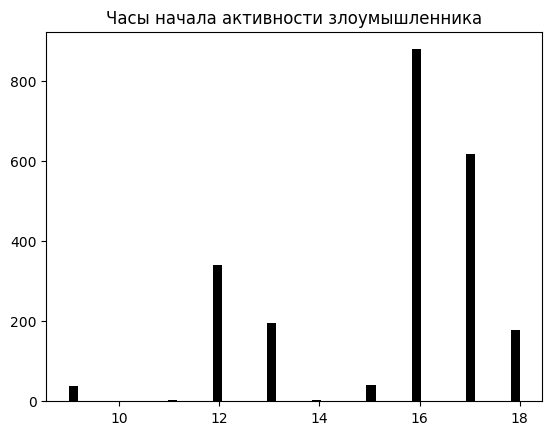

In [92]:
time = pd.concat([data_all['start_hour'][:253561], y], axis=1)
time[time['target'] == 1]['start_hour'].hist(color='black', bins=50)
plt.title('Часы начала активности злоумышленника')
plt.grid(False);

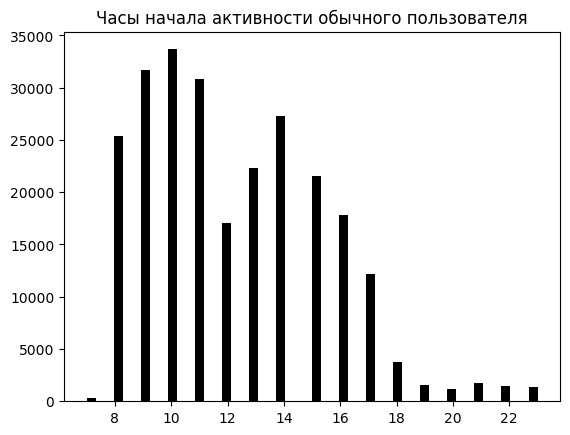

In [93]:
time[time['target'] == 0]['start_hour'].hist(color='black', bins=50)
plt.title('Часы начала активности обычного пользователя')
plt.grid(False);

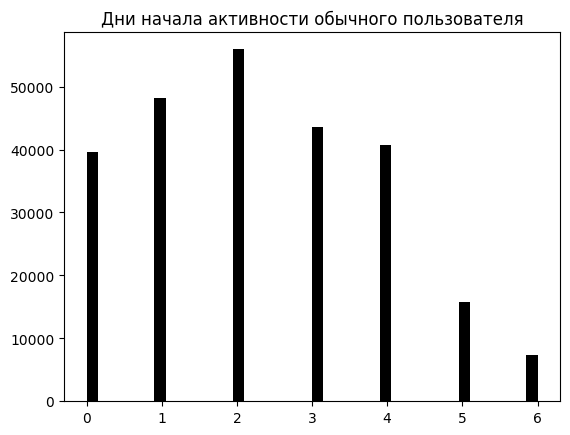

In [94]:
day = pd.concat([data_all['weekday'][:253561], y], axis=1)
day[day['target'] == 0]['weekday'].hist(color='black', bins=40)
plt.title('Дни начала активности обычного пользователя')
plt.grid(False);

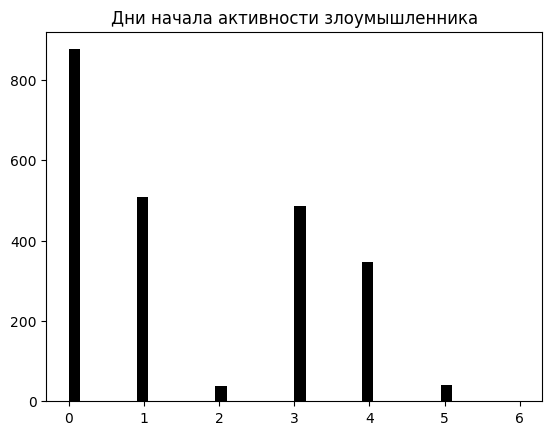

In [95]:
day[day['target'] == 1]['weekday'].hist(color='black', bins=40)
plt.title('Дни начала активности злоумышленника')
plt.grid(False);

Из полученных гистограмм мы можем видень что сеансы злоумышленника начинаются в понедельник, вторник, четверг и в 16-17 часов

## 1.4 Конструирование признаков (Feature Engineering)

Необходимо создать такой признак, который будет представлять собой число вида ГГГГММ от той даты, когда проходила сессия. Например, 201407 - 2014 год и 7 месяц. Таким образом, мы будем учитывать помесячный линейный тренд за весь период предоставленных данных.

In [96]:
data_all['ГГГГММ'] = data_all['time1'].apply(lambda x: str(x.year)) +\
    data_all['time1'].apply(lambda x: '0'+str(x.month) if len(str(x.month)) < 2 else str(x.month))

data_all['ГГГГММ']

0         201402
1         201402
2         201312
3         201403
4         201402
           ...  
336353    201410
336354    201405
336355    201405
336356    201405
336357    201411
Name: ГГГГММ, Length: 336358, dtype: object

Так же добавим несколько новых признаков таких как часы и дни начала сессий и прибавим к нашим данным таблицу полученную из разряженной матрицы

In [97]:
# Как все данные выглядят на текущий момент
data_all.head(4).T

,0,1,2,3
session_id,1,2,3,4
site1,718,890,14769,782
time1,2014-02-20 10:02:45,2014-02-22 11:19:50,2013-12-16 16:40:17,2014-03-28 10:52:12
site2,0,941,39,782
time2,NaT,2014-02-22 11:19:50,2013-12-16 16:40:18,2014-03-28 10:52:42
site3,0,3847,14768,782
time3,NaT,2014-02-22 11:19:51,2013-12-16 16:40:19,2014-03-28 10:53:12
site4,0,941,14769,782
time4,NaT,2014-02-22 11:19:51,2013-12-16 16:40:19,2014-03-28 10:53:42
site5,0,942,37,782


Такие признаки как время и день начала сессии уже добавленны

Добавим такой признак как длина сесии

In [98]:
end = data_all['time10']
start = data_all['time1']
dif = end - start

data_all['sesion_time'] = dif.dt.total_seconds()

In [99]:
data_all.head(4).T

,0,1,2,3
session_id,1,2,3,4
site1,718,890,14769,782
time1,2014-02-20 10:02:45,2014-02-22 11:19:50,2013-12-16 16:40:17,2014-03-28 10:52:12
site2,0,941,39,782
time2,NaT,2014-02-22 11:19:50,2013-12-16 16:40:18,2014-03-28 10:52:42
site3,0,3847,14768,782
time3,NaT,2014-02-22 11:19:51,2013-12-16 16:40:19,2014-03-28 10:53:12
site4,0,941,14769,782
time4,NaT,2014-02-22 11:19:51,2013-12-16 16:40:19,2014-03-28 10:53:42
site5,0,942,37,782


Так как из столбцов time мы использовали всю информацию принято решение избавится от них

In [100]:
time = [f'time{i}' for i in range(1, 11)]
for col in time:
    data_all.drop(columns=[col], inplace=True)

# 1.5 Выгрузка данных

In [101]:
# Полученный датасет
data_all.head(4)

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,start_hour,weekday,ГГГГММ,sesion_time
0,1,718,0,0,0,0,0,0,0,0,0,10,3,201402,NaN
1,2,890,941,3847,941,942,3846,3847,3846,1516,1518,11,5,201402,26.0
2,3,14769,39,14768,14769,37,39,14768,14768,14768,14768,16,0,201312,7.0
3,4,782,782,782,782,782,782,782,782,782,782,10,4,201403,270.0


In [102]:
# Разабьём на тренеровочный и тестовый наборы
train = data_all[:253561]
test = data_all[253561:]

# Так же тренеровочному набору вернём столбец с целевой меткой
train = pd.concat([train, y], axis=1)

train.head(4)

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,start_hour,weekday,ГГГГММ,sesion_time,target
0,1,718,0,0,0,0,0,0,0,0,0,10,3,201402,NaN,0
1,2,890,941,3847,941,942,3846,3847,3846,1516,1518,11,5,201402,26.0,0
2,3,14769,39,14768,14769,37,39,14768,14768,14768,14768,16,0,201312,7.0,0
3,4,782,782,782,782,782,782,782,782,782,782,10,4,201403,270.0,0


In [103]:
test.head(4)

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,start_hour,weekday,ГГГГММ,sesion_time
253561,1,29,35,22,321,23,2211,6730,21,44582,15336,11,5,201410,7.0
253562,2,782,782,782,782,782,782,782,782,782,782,11,3,201407,85.0
253563,3,55,55,55,55,55,55,55,55,1445,1445,15,4,201412,84.0
253564,4,1023,1022,50,222,202,3374,50,48,48,3374,10,1,201411,4.0


In [106]:
# Выгрузим данные
import scipy.sparse

In [107]:
train.to_csv("train.csv")
test.to_csv("test.csv")
scipy.sparse.save_npz('new_features_test.npz', new_features_test)
scipy.sparse.save_npz('new_features_train.npz', new_features_train)